In [ ]:
# blank
# fontsize=FontSize)

In [ ]:
# Box pplot for power range
# calculate EDFA input/output power range 
# one for booster and one for preamp 
from libs.edfa_visual_libs import *

def filter_power(input_powers, output_powers, threshold):
    return_in , return_out = [], []
    for indx in range(len(output_powers)):
        if output_powers[indx] <= threshold:
            continue
        else:
            return_in.append(input_powers[indx])
            return_out.append(output_powers[indx])
    return return_in,return_out

def draw_reg_boundary(power_boundary,color):
    for indx in range(4):
        x_0 = power_boundary[indx][0]
        x_1 = power_boundary[(indx+1)%4][0]
        y_0 = power_boundary[indx][1]
        y_1 = power_boundary[(indx+1)%4][1]
        plt.plot([x_0,x_1],[y_0,y_1],color,zorder=3)

def draw_ref_boundary(threholds):
    for ocm_type in ["operation","alarm"]:
        plt.axhline(y=threholds[ocm_type][0], color='k', linestyle='--',zorder=3)
        plt.axhline(y=threholds[ocm_type][1], color='k', linestyle='--',zorder=3)

def draw_gain_boundary(power_boundary,color):
    for indx in [1,3]:
        x_0 = power_boundary[indx][0]
        x_1 = power_boundary[(indx+1)%4][0]
        y_0 = power_boundary[indx][1]
        y_1 = power_boundary[(indx+1)%4][1]
        plt.plot([x_0,x_1],[y_0,y_1],color,zorder=3)

# calculated boundary
power_boundary = {
    "booster":(
        # operation range
        [(-26.4,-3),(-16.4,-3),(9.5,22.9),(-0.5,22.9)], # calculated range, 13.4-23.4
        [(-24,-3),(-18,-3),(7.9,22.9),(1.9,22.9)], # measure power range, 15 - 21
        # alarm range
        [(-33.9,-10),(-23.4,-10),(14.1,27.5),(4.1,27.5)], # calculated range, 13.4-23.4
        [(-31,-10),(-25,-10),(12.5,27.5),(6.5,27.5)] # measure power range, 15 - 21
    ),
    "preamp": (
        # operation range
        [(-30.3,-0.5),(-15.3,-0.5),(8.2,23),(-6.8,23)], # calculated range, 14.8-29.8
        [(-21.5,-0.5),(-15.5,-0.5),(8,23),(2,23)], # measure power range, 15 - 21
        # alarm range
        [(-43.8,-14),(-28.8,-14),(10.7,25.5),(-4.3,25.5)], # calculated range, 14.8-29.8
        [(-35,-14),(-29,-14),(10.5,25.5),(4.5,25.5)], # measure power range, 15 - 21
    )
}

ocm_threshold = {
    "booster":{
        "operation":(-3,22.9),
        "alarm":(-10,27.5)
    },
    "preamp": {
        "operation":(-0.5,23),
        "alarm":(-14,25.5)
    }
}
FontSize = 25
savePath = "../MISC/"
forlderPath = "../dataset/"
edfaTypes = ["booster","preamp"]
gainValues = ["15dB","18dB","21dB","24dB","27dB"]
channelTypes = ["fix","extraLow","random","extraRandom"]
roadmNames = ['rdm1-co1','rdm2-co1','rdm1-lg1','rdm2-lg1','rdm3-co1','rdm4-co1','rdm5-co1','rdm6-co1']

for edfaType in edfaTypes:
    inpower,outpower = [],[]
    for gainValue in gainValues:
        inpower_sub,outpower_sub = [],[]
        for channelType in channelTypes:
            for roadmName in roadmNames:
                if gainValue == "27dB" and edfaType == "booster": continue
                if gainValue == "24dB" and edfaType == "booster": continue
                dataFolderPath = forlderPath + edfaType + "/" + gainValue + "/" + channelType + "/"
                dataPath = matchFile("*"+roadmName+"*.json",dataFolderPath)
                data = getJsonData(dataPath)
                input_powers, output_powers = get_pd_power(data,edfaType)
                input_powers, output_powers = filter_power(input_powers, output_powers,-50)
                inpower_sub.extend(input_powers)
                outpower_sub.extend(output_powers)
        inpower.append(inpower_sub)
        outpower.append(outpower_sub)
    # plot
    plt.figure(edfaTypes.index(edfaType),figsize=(6.4,6.4))
    plt.grid(alpha=0.5,linestyle="--",zorder=0)
    plt.scatter(inpower[0],outpower[0],color='green',s=5,zorder=3)
    plt.scatter(inpower[1],outpower[1],color='orange',s=5,zorder=3)
    plt.scatter(inpower[2],outpower[2],color='brown',s=5,zorder=3)
    if len(inpower) > 3:
        plt.scatter(inpower[3],outpower[3],color='purple',s=5,zorder=3)
        plt.scatter(inpower[4],outpower[4],color='blue',s=5,zorder=3)
    # draw_reg_boundary(power_boundary[edfaType][0],'m')
    # draw_reg_boundary(power_boundary[edfaType][1],'c')
    draw_gain_boundary(power_boundary[edfaType][2],'r')
    # draw_gain_boundary(power_boundary[edfaType][3],'r')
    draw_ref_boundary(ocm_threshold[edfaType])
    plt.xlabel("Input Power (dBm)",fontsize=FontSize)
    plt.ylabel("Output Power (dBm)",fontsize=FontSize)
    if edfaType == "booster":
        plt.title("Booster",fontsize=FontSize)
    else:
        plt.title("Preamp",fontsize=FontSize)
    plt.ylim(-15,28)
    plt.xticks(fontsize=FontSize-5,rotation = 0)
    plt.yticks(fontsize=FontSize-5,rotation = 0)
    
    # plt.show()
    # plt.savefig(savePath + edfaType+"_power_range.pdf")
    # plt.savefig(savePath + edfaType+"_power_range.png",dpi=900,bbox_inches='tight')
    plt.savefig(savePath + edfaType+"_power_range.pdf",bbox_inches='tight')
# get_pd_power()


["booster","preamp"] + ["15dB","18dB","21dB"]

In [ ]:
# visualize for individual plots

#  ["booster","preamp"] + ["15dB","18dB","21dB"] for every roadm/channel loading
from libs.edfa_visual_libs import *
import matplotlib.ticker as ticker

forlderPath = "../dataset/"
savePath = "../MISC/"
figure_postName = ".pdf"
edfaTypes = ["booster","preamp"]
edfaNames = ["Booster","Preamp"]
gainValues = ["15dB","18dB","21dB","24dB","27dB"]
channelTypes = ["fix","extraLow","random","extraRandom"]
roadmNames = ['rdm1-co1','rdm2-co1','rdm1-lg1','rdm2-lg1','rdm3-co1','rdm4-co1','rdm5-co1','rdm6-co1']
colorLabel = ['red','green','blue','black','yellow','olive','brown','purple']
Fix_plots  = [True,True,False,False]
random_thresholds=[
    [1,6,21,49],   # random
    [1,6,21,49,96] # extra random 
]

def plotGainDataInWavelength(indxForFigure,fitOrder,dataDict,title,
        saveName=None,scatterColor="blue",alphaNum=0.2,
        gridLine=True,makerSize=2):
    plt.figure(indxForFigure,figsize=(6.4,4.8))
    x_axises, y_data = recoverDict(dataDict)
    x_axis, y_data_min, y_data_mean, y_data_max = statisticDict(dataDict)
    # y_fit_min = fitCurve(fitOrder,x_axis,y_data_min,x_axis)
    # y_fit_mean = fitCurve(fitOrder,x_axis,y_data_mean,x_axis)
    # y_fit_max = fitCurve(fitOrder,x_axis,y_data_max,x_axis)
    # plt.plot(x_axis,y_fit_min,'y--')
    x_axis, x_axises = ChannelToWavelength(x_axis), ChannelToWavelength(x_axises)

    plt.plot(x_axis,y_data_mean,color=scatterColor,linewidth=2)
    if gridLine:
        plt.grid(linestyle = '--', linewidth = 0.5)
    plt.fill_between(x_axis, y_data_min, y_data_max,
                 facecolor=scatterColor,   # The fill color
                 color=scatterColor,       # The outline color
                 alpha=alphaNum,           # Transparency of the fill
                 label='_nolegend_') 
    # plt.scatter(x_axises,y_data,c = scatterColor,alpha=alphaNum,s=makerSize,label='_nolegend_')
    plt.xticks(fontsize=FontSize-10,rotation = 0)
    # tick_spacing = 1
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    plt.xlim(min(x_axis),max(x_axis))
    plt.yticks(fontsize=FontSize-10,rotation = 0)
    plt.xlabel('Wavelength (nm)',fontsize=FontSize)
    plt.ylabel('Gain Ripple (dB)',fontsize=FontSize)
    plt.title(title,fontsize=FontSize)
    if saveName:
        plt.savefig(saveName, bbox_inches='tight', dpi=600)

fgiureFixOffset = 10
figureTotalLen = len(edfaTypes) * len(gainValues) - 2#+ fgiureFixOffset
wavelengthRange = [1530,1540,1550,1560,1567]
wavelengthRangeNames = ["     1530","     1540","     1550","     1560","1567"]
# single channel loading for rdm1-co1 across all channels
lengendNames = [
    "B,15dB","B,18dB","B,21dB",
    "P,15dB","P,18dB","P,21dB","P,24dB","P,27dB"
]
FontSize = 25
figureSaveIndx = -1
for channelType in ["fix","extraLow"]: #channelTypes#
    for roadmName in ['rdm1-co1','rdm5-co1']: #roadmNames#
        figureSaveIndx = figureSaveIndx + 1
        figureIndx = 0
        for edfaType in edfaTypes: # ["preamp"]:
            for gainValue in gainValues: # ["27dB"]:
                if gainValue == "27dB" and edfaType == "booster": continue
                if gainValue == "24dB" and edfaType == "booster": continue
                edfaName = edfaNames[edfaTypes.index(edfaType)]
                dataFolderPath = forlderPath + edfaType + "/" + gainValue + "/" + channelType + "/"
                # print(dataFolderPath)
                dataPath = matchFile("*"+roadmName+"*.json",dataFolderPath)
                data = getJsonData(dataPath)
                # print(dataPath)
                whetherFixOrRandom = Fix_plots[channelTypes.index(channelType)]

                if whetherFixOrRandom:

                    # process and plot data
                    datas = splitDataByOpenChannel(data,edfaType)
                    for j in range(len(datas)):
                        OpenData = datas[j]
                        OpenChannelType = OpenData[0]['open_channel_type'] 
                        
                        saveName = savePath +roadmName+"_"+channelType+"_"+\
                                    OpenChannelType + ' gain profile compare'  + figure_postName
                        if roadmName == "rdm1-co1": roadmNameNew = "ROADM 1"
                        if roadmName == "rdm5-co1": roadmNameNew = "ROADM 5"
                        if channelType == "fix" and OpenChannelType == "fully_loaded_channel_wdm":
                            # title = roadmNameNew +" Full (WDM) Channels"
                            title = roadmNameNew +" WDM Channels"
                            # if roadmName == "rdm1-co1":
                            #     title = "    " + title
                        elif channelType == "extraLow" and OpenChannelType == "single_channel":
                            title = roadmNameNew +" Single Channel"
                        else:
                            continue # ignore all other plots
                        saveName = savePath + title + figure_postName

                        dataBooster = calculateGainDict(OpenData,edfaType,calculateRipple=True)

                        if figureIndx < figureTotalLen-1: 
                            plotGainDataInWavelength(j+figureSaveIndx*(figureTotalLen+fgiureFixOffset),12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2)
                        else:
                            plotGainDataInWavelength(j+figureSaveIndx*(figureTotalLen+fgiureFixOffset),12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2,saveName=saveName)       
                            plt.ylim([-1.,1.])

                            ax = plt.gca()
                            ax.set_xticks(wavelengthRange,wavelengthRangeNames,rotation=0)
                            ax.set_yticks(ax.get_yticks()[::2])
                            if figureSaveIndx == 0:
                
                                ax.set_yticklabels(ax.get_yticks())
                                # ax.yaxis.set_label_coords(-0.15,0)
                            if figureSaveIndx != 0:
                                # ax.axes.get_yaxis().set_visible(False)
                                ax.set_yticklabels([])
                                for tic in ax.yaxis.get_major_ticks():
                                    tic.tick1On = tic.tick2On = False
                                plt.ylabel("")
                            # plt.xlim(ChannelToWavelength([95])[0],ChannelToWavelength([1])[0])
                            if figureSaveIndx == 3:
                                plt.legend(lengendNames,loc='upper right', bbox_to_anchor=(1.57, 1+0.1),fontsize=FontSize-1)
                            plt.savefig(saveName, bbox_inches='tight')
                            
                        figureIndx = figureIndx + 1

## Devices, please run previous block first

In [ ]:
# visualize for different devices plots
# single channel loading ? 
from libs.edfa_visual_libs import *

def plotGainDataInWavelength(indxForFigure,fitOrder,dataDict,title,
        saveName=None,scatterColor="blue",alphaNum=0.2,
        gridLine=True,makerSize=2):
    plt.figure(indxForFigure,figsize=(6.4,4.8))
    x_axises, y_data = recoverDict(dataDict)
    x_axis, y_data_min, y_data_mean, y_data_max = statisticDict(dataDict)
    # y_fit_min = fitCurve(fitOrder,x_axis,y_data_min,x_axis)
    # y_fit_mean = fitCurve(fitOrder,x_axis,y_data_mean,x_axis)
    # y_fit_max = fitCurve(fitOrder,x_axis,y_data_max,x_axis)
    # plt.plot(x_axis,y_fit_min,'y--')
    x_axis, x_axises = ChannelToWavelength(x_axis), ChannelToWavelength(x_axises)
    # print(x_axis)
    plt.plot(x_axis,y_data_mean,color=scatterColor,linewidth=2)
    if gridLine:
        plt.grid(linestyle = '--', linewidth = 0.5)
    plt.fill_between(x_axis, y_data_min, y_data_max,
                 facecolor=scatterColor,   # The fill color
                 color=scatterColor,       # The outline color
                 alpha=alphaNum,           # Transparency of the fill
                 label='_nolegend_') 
    # plt.scatter(x_axises,y_data,c = scatterColor,alpha=alphaNum,s=makerSize,label='_nolegend_')
    plt.xticks(fontsize=FontSize-10,rotation = 0)
    # tick_spacing = 1
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    plt.xlim(min(x_axis),max(x_axis))
    plt.yticks(fontsize=FontSize-10,rotation = 0)
    plt.xlabel('Wavelength (nm)',fontsize=FontSize)
    plt.ylabel('Gain Ripple (dB)',fontsize=FontSize)
    plt.title(title,fontsize=FontSize)
    if saveName:
        plt.savefig(saveName, bbox_inches='tight', dpi=600)

FontSize = 25
forlderPath = "../dataset/"
savePath = "../MISC/"
figure_postName = ".pdf" # "_8devices.png"
edfaTypes = ["booster","preamp"]
edfaNames = ["Booster","Preamp"]
gainValues = ["15dB","18dB","21dB","27dB"]
channelTypes = ["fix","extraLow","random","extraRandom"]
roadmNames = ['rdm1-co1','rdm2-co1','rdm1-lg1','rdm2-lg1','rdm3-co1','rdm4-co1','rdm5-co1','rdm6-co1']
colorLabel = ['red','green','blue','black','yellow','olive','brown','purple']
Fix_plots  = [True,True,False,False]
random_thresholds=[
    [1,6,21,49],   # random
    [1,6,21,49,96] # extra random 
]
roadmNamesLegends = [item for item in roadmNames]
# wavelengthRange = [1530,1540,1550,1565]
# wavelengthRangeNames = ["     1530","     1540","     1550","1565"]
roadmNamesLabels = ["ROADM "+str(i) for i in range(1,9)]
figureTotalLen = len(roadmNames)
# single channel loading for rdm1-co1 across all channels
figureSaveIndx = -1

for channelType in ["fix","extraLow"]: #extraLow# "fix","extraLow"
    for edfaType in ["booster","preamp"]: # booster #"booster","preamp"
        figureIndx = 0
        figureSaveIndx = figureSaveIndx + 1
        for roadmName in roadmNames:#
            for gainValue in ["18dB"]: # "27dB"
                # if gainValue == "27dB" and edfaType == "booster": continue
                edfaName = edfaNames[edfaTypes.index(edfaType)]

                dataFolderPath = forlderPath + edfaType + "/" + gainValue + "/" + channelType + "/"
                # print(dataFolderPath)
                dataPath = matchFile("*"+roadmName+"*.json",dataFolderPath)
                data = getJsonData(dataPath)
                # print(dataPath)
                whetherFixOrRandom = Fix_plots[channelTypes.index(channelType)]

                if whetherFixOrRandom:

                    # process and plot data
                    datas = splitDataByOpenChannel(data,edfaType)
                    for j in range(len(datas)):
                        OpenData = datas[j]
                        OpenChannelType = OpenData[0]['open_channel_type'] 

                        if channelType == "fix" and OpenChannelType == "fully_loaded_channel_wdm":
                            # title = edfaName +" Full (WDM) Channels"
                            title = edfaName +" WDM Channels"
                            # if edfaType == "booster":
                            #     title = "  " + title
                        elif channelType == "extraLow" and OpenChannelType == "single_channel":
                            title = edfaName +" Single Channel"
                        else:
                            continue # ignore all other plots
                        saveName = savePath + title.strip() + figure_postName
                        # try:
                        dataBooster = calculateGainDict(OpenData,edfaType,calculateRipple=True)
                        
                        if figureIndx < figureTotalLen-1: 
                            plotGainDataInWavelength(j+figureSaveIndx*(figureTotalLen+10),12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2)
                        else:
                            plotGainDataInWavelength(j+figureSaveIndx*(figureTotalLen+10),12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2)#,saveName=saveName)       
                            plt.ylim([-1.,1.])
                            ax = plt.gca()
                            ax.set_xticks(wavelengthRange,wavelengthRangeNames,rotation=0)
                            ax.set_yticks(ax.get_yticks()[::2])
                            if figureSaveIndx == 0:
                                ax.set_yticks(ax.get_yticks())
                                ax.set_yticklabels(ax.get_yticks())
                            if figureSaveIndx != 0:
                                # ax.axes.get_yaxis().set_visible(False)
                                ax.set_yticklabels([])
                                for tic in ax.yaxis.get_major_ticks():
                                    tic.tick1On = tic.tick2On = False
                                plt.ylabel("")
                            if figureSaveIndx == 3:
                                plt.legend(roadmNamesLabels,loc='upper right', bbox_to_anchor=(1.68, 1+0.05),fontsize=FontSize)
                            plt.savefig(saveName, bbox_inches='tight')
                        # break
                        figureIndx = figureIndx + 1


## show different channel loading on one figure
#### and show goalpost (+ random channel loading plot)
### Generate some pickle data file 
#### Together with another codes...

In [ ]:
# show different channel loading on one figure
from libs.edfa_visual_libs import *
import pickle

def calculateGainDict_new(data_characterization,label="booster",calculateRipple=False):
    gain_profiles = defaultdict(list)
    # labels by preamp or booster
    if label == "booster":
        channel_type = "open_channel_type"
        dut_edfa_label = "roadm_dut_edfa_info"
        input_power_label = "roadm_dut_wss_output_power_spectra"
        input_limit_label = "booster in"
        output_power_spectra= "roadm_dut_booster_output"
        output_limit_label = "booster out"
        wss_channel_label = "roadm_dut_wss_active_channel_index"
    elif label == "preamp":
        channel_type = "open_channel_type"
        dut_edfa_label = "roadm_dut_preamp_info"
        input_power_label = "roadm_dut_preamp_input_power_spectra"
        input_limit_label = "line in"
        output_power_spectra= "roadm_dut_wss_input_power_spectra"
        output_limit_label = "preamp out"
        wss_channel_label = "roadm_flatten_wss_active_channel_index"
    else:
        raise ValueError(label+"haven't implemented")
    #######################################################################
    indx = 0
    for metadata in data_characterization:
        # if len(metadata[wss_channel_label]) != 4:
        #     continue
        indx = indx + 1
        if indx != 3: # get 3rd set of data
            continue

        # target gain
        gain_target = metadata[dut_edfa_label]["target_gain"]
        wss_channels = metadata[wss_channel_label]
        #delta 1
        edfa_input_power_total = metadata[dut_edfa_label]["input_power"]
        wss_output_power_spectra = np.array(list(metadata[input_power_label].values()))
        wss_output_power_spectra_tmp = returnValidOCMListdata(wss_output_power_spectra,input_limit_label)
        wss_output_power_spectra_total = logsumexp10(wss_output_power_spectra_tmp)
        delta1 = edfa_input_power_total - wss_output_power_spectra_total

        #delta 2
        edfa_output_power_total = metadata[dut_edfa_label]["output_power"]
        booster_out_spectra = np.array(list(metadata[output_power_spectra].values()))
        booster_output_spectra_tmp = returnValidOCMListdata(booster_out_spectra,output_limit_label)
        booster_output_spectra_total = logsumexp10(booster_output_spectra_tmp)
        delta2 = booster_output_spectra_total - edfa_output_power_total
        
        # gain profile
        for i in range(len(wss_channels)):
            indx = wss_channels[i] # indx start from 1, python list start from [0]
            if calculateRipple:
                gain = booster_out_spectra[indx-1] - wss_output_power_spectra[indx-1] - gain_target # - delta1 - delta2
            else:
                gain = booster_out_spectra[indx-1] - wss_output_power_spectra[indx-1] # - delta1 - delta2
            gain_profiles[indx].append(gain)
        
        # only want one set of plots figure ....
        break

    return gain_profiles


forlderPath = "../dataset/"
savePath = "../tmp_figures_paper/gain_results/"
figure_postName = "_8devices.png" # "_8devices.png"
edfaTypes = ["booster","preamp"]
gainValues = ["15dB","18dB","21dB"]
channelTypes = ["fix","extraLow","random","extraRandom"]
roadmNames = ['rdm1-co1','rdm2-co1','rdm1-lg1','rdm2-lg1','rdm3-co1','rdm4-co1','rdm5-co1','rdm6-co1']
colorLabel = ['red','green','blue','black','yellow','olive','brown','purple']
Fix_plots  = [True,True,False,False]
random_thresholds=[
    [1,6,21,49],   # random
    [1,6,21,49,96] # extra random 
]
roadmNamesLegends = [item for item in roadmNames]

figureTotalLen = len(roadmNames)
# single channel loading for rdm1-co1 across all channels
figureSaveIndx = -1

for channelType in ["fix"]: #extraLow# "fix","extraLow"
    for edfaType in ["booster"]: # booster #"booster","preamp"
        figureIndx = 0
        figureSaveIndx = figureSaveIndx + 1
        for roadmName in ['rdm1-co1']:#
            for gainValue in ["18dB"]: # "27dB"
        
                dataFolderPath = forlderPath + edfaType + "/" + gainValue + "/" + channelType + "/"
                # print(dataFolderPath)
                dataPath = matchFile("*"+roadmName+"*.json",dataFolderPath)
                data = getJsonData(dataPath)
                # print(dataPath)
                whetherFixOrRandom = Fix_plots[channelTypes.index(channelType)]

                if whetherFixOrRandom:
                    
                    # process and plot data
                    datas = splitDataByOpenChannel(data,edfaType)
                    for j in range(len(datas)):
                        OpenData = datas[j]
                        OpenChannelType = OpenData[0]['open_channel_type'] 
                        if OpenChannelType != "goalpost_channel_unbalanced_freq_low_high":#single_channel
                            continue
                        print(OpenChannelType)
                        dataBooster = calculateGainDict_new(OpenData,edfaType,calculateRipple=True)
                        with open('fix_goalpost_unbalance_16_lowhigh.pickle', 'wb') as handle:
                            pickle.dump(dataBooster, handle)
                        print(dataBooster)
                        break

                else:
                    
                    # process and plot data
                    dataBooster = calculateGainDict_new(data,edfaType,calculateRipple=True)
                    import pickle
                    with open('random_10_10set.pickle', 'wb') as handle:
                        pickle.dump(dataBooster, handle)
                    print(dataBooster)
                    break
                    


TMP use for visualizing the 24 dB gain

../dataset/preamp/24dB/random/edfa_meas_rdm3-co1.bed_preamp_2022.10.14.17.07.49.json
../dataset/preamp/24dB/random/edfa_meas_rdm4-co1.bed_preamp_2022.10.14.17.07.49.json
../dataset/preamp/24dB/random/edfa_meas_rdm5-co1.bed_preamp_2022.10.15.13.04.00.json
../dataset/preamp/24dB/random/edfa_meas_rdm6-co1.bed_preamp_2022.10.15.13.04.00.json


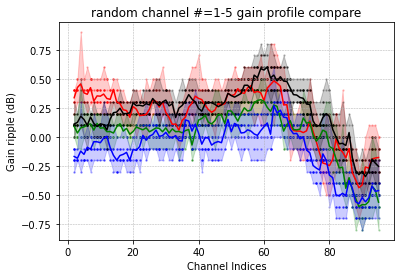

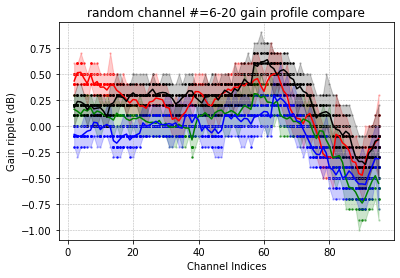

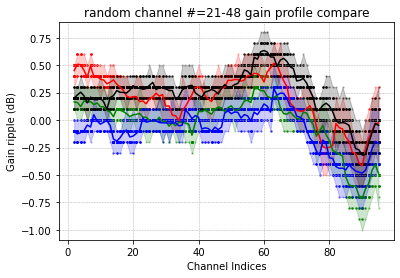

In [2]:
# visual 24 dB gain
# visualize for individual plots
#  ["booster","preamp"] + ["15dB","18dB","21dB"] for every roadm/channel loading
from libs.edfa_visual_libs import *

forlderPath = "../dataset/"
savePath = "../MISC/internal_figures/"
figure_postName = "_debug.png"
edfaTypes = ["booster","preamp"]
gainValues = ["15dB","18dB","21dB"]
channelTypes = ["fix","extraLow","random","extraRandom"]
roadmNames = ['rdm1-co1','rdm2-co1','rdm1-lg1','rdm2-lg1','rdm3-co1','rdm4-co1','rdm5-co1','rdm6-co1']
colorLabel = ['red','green','blue','black','yellow','olive','brown','purple']
Fix_plots  = [True,True,False,False]
random_thresholds=[
    [1,6,21,49],   # random
    [1,6,21,49,96] # extra random 
]

fgiureFixOffset = 10
figureTotalLen = len(roadmNames) #+ fgiureFixOffset
# single channel loading for rdm1-co1 across all channels
figureSaveIndx = -1
for channelType in ["random"]: #channelTypes#
    for edfaType in ["preamp"]: # ["preamp"]:
        figureSaveIndx = figureSaveIndx + 1
        figureIndx = 0
        for roadmName in ['rdm3-co1','rdm4-co1','rdm5-co1','rdm6-co1']:#roadmNames: #roadmNames#
            for gainValue in ["24dB"]: # ["27dB"]:
        
                dataFolderPath = forlderPath + edfaType + "/" + gainValue + "/" + channelType + "/"
                dataPath = matchFile("*"+roadmName+"*.json",dataFolderPath)
                print(dataPath)
                data = getJsonData(dataPath)
                # print(dataPath)
                whetherFixOrRandom = Fix_plots[channelTypes.index(channelType)]

                if whetherFixOrRandom:

                    # process and plot data
                    datas = splitDataByOpenChannel(data,edfaType)
                    for j in range(len(datas)):
                        OpenData = datas[j]
                        OpenChannelType = OpenData[0]['open_channel_type'] 
                        
                        saveName = savePath +roadmName+"_"+channelType+"_"+\
                                    OpenChannelType + ' gain profile compare'  + figure_postName
                        title = OpenChannelType + '\n channel gain profile compare'
                        # try:
                        dataBooster = calculateGainDict(OpenData,edfaType,calculateRipple=True)
                            # dataBooster = calculate1spanGainDict(OpenData,calculateRipple=True)
                        # except Exception as e:
                            # print(datasetName[i])
                            # print(e)
                        # plotGainData(j,12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2)

                        if figureIndx < figureTotalLen-1: 
                            plotGainData(j+figureSaveIndx*(figureTotalLen+fgiureFixOffset),12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2)
                        else:
                            plotGainData(j+figureSaveIndx*(figureTotalLen+fgiureFixOffset),12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2,saveName=saveName)       
                            # plt.close()
                else:

                    # process and plot data
                    random_threshold = random_thresholds[channelTypes.index(channelType)-2]
                    datas = splitDataByOpenChannel(data,edfaType,not Fix_plots[channelTypes.index(channelType)],threshold=random_threshold)
                    for j in range(len(datas)):
                        OpenData = datas[j]
                        OpenChannelLenStart = random_threshold[j]
                        OpenChannelLenEnd = random_threshold[j+1] - 1
                        OpenChannelRange = str(OpenChannelLenStart) + '-' + str(OpenChannelLenEnd) 
                        saveName = savePath +roadmName+"_"+channelType+"_"+\
                                 'RANDOM random channel #='+ OpenChannelRange + ' gain profile compare' + figure_postName
                        title = 'random channel #='+ OpenChannelRange + ' gain profile compare'
                        dataBooster = calculateGainDict(OpenData,edfaType,calculateRipple=True)
                        # dataBooster = calculate1spanGainDict(OpenData,calculateRipple=True)
                        # plotGainData(j,12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2)
                        if figureIndx < figureTotalLen-1: 
                            plotGainData(j+figureSaveIndx*(figureTotalLen+fgiureFixOffset),12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2)
                            # print(figureIndx,figureTotalLen)
                        else:
                            plotGainData(j+figureSaveIndx*(figureTotalLen+fgiureFixOffset),12,dataBooster,title,scatterColor=colorLabel[figureIndx],alphaNum=0.2,saveName=saveName)       
                            # plt.close()
                figureIndx = figureIndx + 1



### Get gain/booster/preamp status across different devices...

In [ ]:
# statistic results
from libs.edfa_visual_libs import *

forlderPath = "../dataset/"
savePath = "../MISC/"
figure_postName = "_debug.png"
edfaTypes = ["booster","preamp"]
gainValues = ["15dB","18dB","21dB","24dB","27dB"]
channelTypes = ["fix","extraLow","random","extraRandom"]
roadmNames = ['rdm1-co1','rdm2-co1','rdm1-lg1','rdm2-lg1','rdm3-co1','rdm4-co1','rdm5-co1','rdm6-co1']
colorLabel = ['red','green','blue','black','yellow','olive','brown','purple']
Fix_plots  = [True,True,False,False]
random_thresholds=[
    [1,6,21,49],   # random
    [1,6,21,49,96] # extra random 
]

###########################################
def peak_to_peak_gain_ripple_of_all_channels(data,edfaType):
    # return a list
    gain_profiles = defaultdict(list)
    # labels by preamp or booster
    if edfaType == "booster":
        dut_edfa_label = "roadm_dut_edfa_info"
        input_power_label = "roadm_dut_wss_output_power_spectra"
        input_limit_label = "booster in"
        output_power_spectra= "roadm_dut_booster_output"
        output_limit_label = "booster out"
        wss_channel_label = "roadm_dut_wss_active_channel_index"
    elif edfaType == "preamp":
        dut_edfa_label = "roadm_dut_preamp_info"
        input_power_label = "roadm_dut_preamp_input_power_spectra"
        input_limit_label = "line in"
        output_power_spectra= "roadm_dut_wss_input_power_spectra"
        output_limit_label = "preamp out"
        wss_channel_label = "roadm_flatten_wss_active_channel_index"
    else:
        raise ValueError(edfaType+"haven't implemented")
    #######################################################################
    peak_to_peaks = []
    for metadata in data:
        # target gain
        gain_target = metadata[dut_edfa_label]["target_gain"]
        wss_channels = metadata[wss_channel_label]
        #delta 1
        edfa_input_power_total = metadata[dut_edfa_label]["input_power"]
        wss_output_power_spectra = np.array(list(metadata[input_power_label].values()))
        wss_output_power_spectra_tmp = returnValidOCMListdata(wss_output_power_spectra,input_limit_label)
        wss_output_power_spectra_total = logsumexp10(wss_output_power_spectra_tmp)
        delta1 = edfa_input_power_total - wss_output_power_spectra_total

        #delta 2
        edfa_output_power_total = metadata[dut_edfa_label]["output_power"]
        booster_out_spectra = np.array(list(metadata[output_power_spectra].values()))
        booster_output_spectra_tmp = returnValidOCMListdata(booster_out_spectra,output_limit_label)
        booster_output_spectra_total = logsumexp10(booster_output_spectra_tmp)
        delta2 = booster_output_spectra_total - edfa_output_power_total
        
        # gain profile
        gain_channels = []
        for i in range(len(wss_channels)):
            indx = wss_channels[i] # indx start from 1, python list start from [0]
            if check_ocm_range(wss_output_power_spectra[indx-1],
                            booster_out_spectra[indx-1],edfaType) == False:
                pass # continue
            gain = booster_out_spectra[indx-1] - wss_output_power_spectra[indx-1] - gain_target
            gain_channels.append(gain)
        if len(gain_channels) == 0: continue
        pkpk = np.max(gain_channels) - np.min(gain_channels)
        if pkpk !=0: peak_to_peaks.append(pkpk)
    return peak_to_peaks

def check_ocm_range(inputOCM,outputOCM,edfaType):
    if edfaType == "booster":
        edfa_in_label,edfa_out_label = "booster in","booster out"
    else:
        edfa_in_label,edfa_out_label = "line in","preamp out"
    if inputOCM < Lumentum_ocm_threshold[edfa_in_label][0]:
        return False
    elif inputOCM > Lumentum_ocm_threshold[edfa_in_label][1]:
        return False
    elif outputOCM < Lumentum_ocm_threshold[edfa_out_label][0]:
        return False
    elif outputOCM > Lumentum_ocm_threshold[edfa_out_label][1]:
        return False
    else:
        return True

def pkpks_combined(outputList,intputList):
    outputList.extend(intputList)
    return outputList

def gain_dict_to_list(gain_dict):
    gain_list = []
    for gains in gain_dict.values():
        gain_list.extend(gains)
    return gain_list

def gain_dict_combined(outputDict,intputDict):
    for key in intputDict.keys():
        outputDict[key].extend(intputDict[key])
    return outputDict

def gain_peak_to_peak(gain_dict):
    gain_list = []
    for gains in gain_dict.values():
        if isinstance(gains, np.float64):
            gain_list.append(0)
            # pass
        else:
            gain_list.append(np.max(gains)-np.min(gains))

    return gain_list
###########################################

fgiureFixOffset = 10
figureTotalLen = len(edfaTypes) * len(gainValues) #+ fgiureFixOffset
# single channel loading for rdm1-co1 across all channels
figureSaveIndx = -1
results = []
for edfaType in edfaTypes: # ["preamp"]:
    for gainValue in gainValues: # ["27dB"]:
        if edfaType == "booster" and gainValue=="27dB": continue
        if edfaType == "booster" and gainValue=="24dB": continue
        figureSaveIndx = figureSaveIndx + 1
        figureIndx = 0
        devices_gain = []
        for roadmName in roadmNames: #roadmNames#
            gain_list = []
            # gain_profiles = defaultdict(list)
            pks = []
            for channelType in channelTypes: #channelTypes#

                dataFolderPath = forlderPath + edfaType + "/" + gainValue + "/" + channelType + "/"
                # print(dataFolderPath)
                dataPath = matchFile("*"+roadmName+"*.json",dataFolderPath)
                data = getJsonData(dataPath)

                # dataBooster = calculateGainDict(data,edfaType,calculateRipple=True)
                # gain_profiles = gain_dict_combined(gain_profiles,dataBooster)

                pkstmp = peak_to_peak_gain_ripple_of_all_channels(data,edfaType)
                pks = pkpks_combined(pks,pkstmp)
            
                # gain_list.extend(gain_peak_to_peak(dataBooster))
            # devices_gain.append(np.mean(gain_peak_to_peak(gain_profiles)))
            devices_gain.append(np.mean(pks))
        results.append(devices_gain)



In [ ]:
# print(results)
import matplotlib
import seaborn as sns
import copy
lengendNames = [
    "Booster,15dB","Booster,18dB","Booster,21dB",
    "Pre-amplifier,15dB","Pre-amplifier,18dB","Pre-amplifier,21dB",
    "Pre-amplifier,24dB","Pre-amplifier,27dB"
]
xticksLabels = [" "*6+str(item) for item in [*range(1,9)]]
# roadmNamesLabel = [] 
edta_legend = [edfaType+"_"+gainValue for edfaType in edfaTypes for gainValue in gainValues]
colorLabel = ['red','green','blue','black','yellow','olive','brown','purple']
base_yaxis = [*range(8)]
bar_xaxises = []
legend_num = 8
norm_results = copy.copy(results)
for indx1 in range(len(results)):
    for indx2 in range(len(results[0])):
        norm_results[indx1][indx2]= round(norm_results[indx1][indx2],1)
        if norm_results[indx1][indx2] == 0: norm_results[indx1][indx2] = 0
# for indx in range(legend_num):
#     bar_xaxises.append([data + indx*1/legend_num - 1/2 for data in base_xaxis])
# for colorIndx in range(legend_num):
#     plt.bar(bar_xaxises[colorIndx],results[colorIndx],width=1/legend_num,color=colorLabel[colorIndx])
fig, ax1 = matplotlib.pyplot.subplots(figsize=(8,6))
sns.heatmap(norm_results,annot=True,ax=ax1, annot_kws={"fontsize":FontSize-10})
cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=FontSize)
# plt.xticks([*range(8)],roadmNames,rotation = 45,fontsize=FontSize)
plt.xticks([*range(8)],xticksLabels,rotation = 0,fontsize=FontSize)
plt.yticks(base_yaxis,lengendNames,fontsize=FontSize,rotation = 0)
# ax.yaxis.get_majorticklabels()[2].set_y(-.1)
dx = 0/72.; dy = -25/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax1.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
plt.xlabel("ROADM Index",fontsize=FontSize)
plt.title("Mean Peak-to-peak Gain Ripple (dB)",fontsize=FontSize)
# plt.legend(edta_legend,fontsize=FontSize)
plt.savefig(savePath+"statistic.pdf", bbox_inches='tight')

Internal test for check the validation of OCM measurement

In [ ]:
# test for two things
# 1. it is 0 dB for all the measurements (but if we measure booster output instead of 
# line out then it should be okay)
# 2. all the 96 connections are made in an ascending order

# visualize several things...
# 
from libs.edfa_visual_libs import *

forlderPath = "../dataset/"
savePath = "../MISC/internal_figures/"
figure_postName = "_debug.png"
edfaTypes = ["booster","preamp"]
gainValues = ["15dB","18dB","21dB"]
channelTypes = ["fix","extraLow","random","extraRandom"]
roadmNames = ['rdm1-co1','rdm2-co1','rdm1-lg1','rdm2-lg1','rdm3-co1','rdm4-co1','rdm5-co1','rdm6-co1']
colorLabel = ['red','green','blue','black','yellow','olive','brown','purple']
Fix_plots  = [True,True,False,False]
random_thresholds=[
    [1,6,21,49],   # random
    [1,6,21,49,96] # extra random 
]

fgiureFixOffset = 10
figureTotalLen = len(edfaTypes) * len(gainValues) #+ fgiureFixOffset
# single channel loading for rdm1-co1 across all channels
figureSaveIndx = -1
voa_data = []
for channelType in channelTypes: 
    for roadmName in roadmNames: 
        figureSaveIndx = figureSaveIndx + 1
        figureIndx = 0
        for edfaType in edfaTypes:
            for gainValue in gainValues:
        
                dataFolderPath = forlderPath + edfaType + "/" + gainValue + "/" + channelType + "/"
                dataPath = matchFile("*"+roadmName+"*.json",dataFolderPath)
                data = getJsonData(dataPath)

                for eachdata in data:
                    # try:
                    if edfaType == "booster":
                        tmpLabel = "roadm_dut_line_port_info"
                    else:
                        tmpLabel = "roadm_flatten_line_port_info"
                    tmpData = eachdata[tmpLabel]["outvoa-actual-attenuation"]
                    
                    if tmpData >= 0.01:
                        # print(tmpData)
                        voa_data.append(tmpData)
                    # except:
                    #     print(channelType,roadmName,edfaType,gainValue)
# print("all works fine.")
plt.hist(voa_data)